# CPU SCHEDULING Algorithm

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
def TurnAroundPlot(self, turn_around_list):
    objects =['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
    objects=objects[0:len(turn_around_list)-1]




    y_pos = np.arange(len(objects))
    performance = turn_around_list[1:]

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Turnaround time')
    plt.xlabel('Process ID')
    plt.title('Turnaround time for each process')
    plt.show()
    
def WaitingPlot(self, waiting_list):
    objects =['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
    objects=objects[0:len(waiting_list)-1]




    y_pos = np.arange(len(objects))
    performance = waiting_list[1:]

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Waiting time')
    plt.xlabel('Process ')
    plt.title('Waiting time for each process')
    plt.show()

In [2]:
#FCFS
class FCFS:
    def processData(self, no_of_processes):
        process_data = []
        for i in range(no_of_processes):
            temporary = []
            process_id = int(input("Enter Process ID: "))

            arrival_time = int(input("Enter Arrival Time: "))

            burst_time = int(input(f"Enter Burst Time for Process {process_id}: "))

            temporary.extend([process_id, arrival_time, burst_time])
            process_data.append(temporary)
        FCFS.schedulingProcess(self, process_data)

    def schedulingProcess(self, process_data):
        process_data.sort(key=lambda x: x[1])
       
        """Sort according to Arrival Time""" 
       
        start_time = []
        exit_time = []
        s_time = 0
        for i in range(len(process_data)):
            if s_time < process_data[i][1]:
                s_time = process_data[i][1]
            start_time.append(s_time)
            s_time = s_time + process_data[i][2]
            e_time = s_time
            exit_time.append(e_time)
            process_data[i].append(e_time)
        t_time = FCFS.calculateTurnaroundTime(self, process_data)
        w_time = FCFS.calculateWaitingTime(self, process_data)
        FCFS.printData(self, process_data, t_time, w_time)

    def calculateTurnaroundTime(self, process_data):
        total_turnaround_time = 0
        turn_around_list = [0]
        for i in range(len(process_data)):
            turnaround_time = process_data[i][3] - process_data[i][1]
            
            
            '''
            turnaround_time = completion_time - arrival_time
            '''
            total_turnaround_time = total_turnaround_time + turnaround_time
            turn_around_list.append(turnaround_time)
            process_data[i].append(turnaround_time)
        
        TurnAroundPlot(self, turn_around_list)
        
        average_turnaround_time = total_turnaround_time / len(process_data)
        '''
        average_turnaround_time = total_turnaround_time / no_of_processes
        '''
        return average_turnaround_time
        
    
        
    def calculateWaitingTime(self, process_data):
        total_waiting_time = 0
        waiting_list = [0]
        for i in range(len(process_data)):
            waiting_time = process_data[i][4] - process_data[i][2]
            '''
            waiting_time = turnaround_time - burst_time
            '''
            total_waiting_time = total_waiting_time + waiting_time
            waiting_list.append(waiting_time)
            process_data[i].append(waiting_time)
        
        WaitingPlot(self, waiting_list)
        average_waiting_time = total_waiting_time / len(process_data)
        '''
        average_waiting_time = total_waiting_time / no_of_processes
        '''
        return average_waiting_time

    def printData(self, process_data, average_turnaround_time, average_waiting_time):
        print(f'Average Turnaround Time: {average_turnaround_time}')
        print(f'Average Waiting Time: {average_waiting_time}')



In [3]:
# SJF


class SJF:

    def processData(self, no_of_processes):
        process_data = []
        for i in range(no_of_processes):
            temporary = []
            process_id = int(input("Enter Process ID: "))
            arrival_time = int(input(f"Enter Arrival Time for Process {process_id}: "))
            burst_time = int(input(f"Enter Burst Time for Process {process_id}: "))
            temporary.extend([process_id, arrival_time, burst_time, 0, burst_time])
            '''
            '0' is the state of the process. 0 means not executed and 1 means execution complete
            '''
            process_data.append(temporary)
        SJF.schedulingProcess(self, process_data)

    def schedulingProcess(self, process_data):
        start_time = []
        exit_time = []
        s_time = 0
        sequence_of_process = []
        process_data.sort(key=lambda x: x[1])
        '''
        Sort processes according to the Arrival Time
        '''
        while 1:
            ready_queue = []
            normal_queue = []
            temp = []
            for i in range(len(process_data)):
                if process_data[i][1] <= s_time and process_data[i][3] == 0:
                    temp.extend([process_data[i][0], process_data[i][1], process_data[i][2], process_data[i][4]])
                    ready_queue.append(temp)
                    temp = []
                elif process_data[i][3] == 0:
                    temp.extend([process_data[i][0], process_data[i][1], process_data[i][2], process_data[i][4]])
                    normal_queue.append(temp)
                    temp = []
            if len(ready_queue) == 0 and len(normal_queue) == 0:
                break
            if len(ready_queue) != 0:
                ready_queue.sort(key=lambda x: x[2])
                '''
                Sort processes according to Burst Time
                '''
                start_time.append(s_time)
                s_time = s_time + 1
                e_time = s_time
                exit_time.append(e_time)
                sequence_of_process.append(ready_queue[0][0])
                for k in range(len(process_data)):
                    if process_data[k][0] == ready_queue[0][0]:
                        break
                process_data[k][2] = process_data[k][2] - 1
                if process_data[k][2] == 0:        #If Burst Time of a process is 0, it means the process is completed
                    process_data[k][3] = 1
                    process_data[k].append(e_time)
            if len(ready_queue) == 0:
                if s_time < normal_queue[0][1]:
                    s_time = normal_queue[0][1]
                start_time.append(s_time)
                s_time = s_time + 1
                e_time = s_time
                exit_time.append(e_time)
                sequence_of_process.append(normal_queue[0][0])
                for k in range(len(process_data)):
                    if process_data[k][0] == normal_queue[0][0]:
                        break
                process_data[k][2] = process_data[k][2] - 1
                if process_data[k][2] == 0:        #If Burst Time of a process is 0, it means the process is completed
                    process_data[k][3] = 1
                    process_data[k].append(e_time)
        t_time = SJF.calculateTurnaroundTime(self, process_data)
        w_time = SJF.calculateWaitingTime(self, process_data)
        SJF.printData(self, process_data, t_time, w_time, sequence_of_process)

    def calculateTurnaroundTime(self, process_data):
        total_turnaround_time = 0
        turn_around_list = [0]
        for i in range(len(process_data)):
            turnaround_time = process_data[i][5] - process_data[i][1]
            '''
            turnaround_time = completion_time - arrival_time
            '''
            total_turnaround_time = total_turnaround_time + turnaround_time
            process_data[i].append(turnaround_time)
            turn_around_list.append(turnaround_time)
        
        TurnAroundPlot(self, turn_around_list)
            
        average_turnaround_time = total_turnaround_time / len(process_data)
        '''
        average_turnaround_time = total_turnaround_time / no_of_processes
        '''
        return average_turnaround_time

    def calculateWaitingTime(self, process_data):
        total_waiting_time = 0
        waiting_list = [0]
        for i in range(len(process_data)):
            waiting_time = process_data[i][6] - process_data[i][4]
            '''
            waiting_time = turnaround_time - burst_time
            '''
            total_waiting_time = total_waiting_time + waiting_time
            process_data[i].append(waiting_time)
            waiting_list.append(waiting_time)
        
        WaitingPlot(self, waiting_list)
        average_waiting_time = total_waiting_time / len(process_data)
        '''
        average_waiting_time = total_waiting_time / no_of_processes
        '''
        return average_waiting_time

    def printData(self, process_data, average_turnaround_time, average_waiting_time, sequence_of_process):
        process_data.sort(key=lambda x: x[0])
        '''
        Sort processes according to the Process ID
        '''
        
        print(f'Average Turnaround Time: {average_turnaround_time}')
        print(f'Average Waiting Time: {average_waiting_time}')
        print(f'Sequence of Process: {sequence_of_process}')

In [4]:
# Round Robin

class RoundRobin:

    def processData(self, no_of_processes):
        process_data = []
        for i in range(no_of_processes):
            temporary = []
            process_id = int(input("Enter Process ID: "))

            arrival_time = int(input(f"Enter Arrival Time for Process {process_id}: "))

            burst_time = int(input(f"Enter Burst Time for Process {process_id}: "))

            temporary.extend([process_id, arrival_time, burst_time, 0, burst_time])
            '''
            '0' is the state of the process. 0 means not executed and 1 means execution complete
            
            '''
            process_data.append(temporary)

        quantumTime = int(input("Enter Quantum Time: "))

        RoundRobin.schedulingProcess(self, process_data, quantumTime)

    def schedulingProcess(self, process_data, quantumTime):
        start_time = []
        exit_time = []
        executed_process = []
        ready_queue = []
        s_time = 0
        process_data.sort(key=lambda x: x[1])
        '''
        Sort processes according to the Arrival Time
        '''
        while 1:
            normal_queue = []
            temp = []
            for i in range(len(process_data)):
                if process_data[i][1] <= s_time and process_data[i][3] == 0:
                    present = 0
                    if len(ready_queue) != 0:
                        for k in range(len(ready_queue)):
                            if process_data[i][0] == ready_queue[k][0]:
                                present = 1
                    '''
                    The above if loop checks that the next process is not a part of ready_queue
                    '''
                    if present == 0:
                        temp.extend([process_data[i][0], process_data[i][1], process_data[i][2], process_data[i][4]])
                        ready_queue.append(temp)
                        temp = []
                    '''
                    The above if loop adds a process to the ready_queue only if it is not already present in it
                    '''
                    if len(ready_queue) != 0 and len(executed_process) != 0:
                        for k in range(len(ready_queue)):
                            if ready_queue[k][0] == executed_process[len(executed_process) - 1]:
                                ready_queue.insert((len(ready_queue) - 1), ready_queue.pop(k))
                    '''
                    The above if loop makes sure that the recently executed process is appended at the end of ready_queue
                    '''
                elif process_data[i][3] == 0:
                    temp.extend([process_data[i][0], process_data[i][1], process_data[i][2], process_data[i][4]])
                    normal_queue.append(temp)
                    temp = []
            if len(ready_queue) == 0 and len(normal_queue) == 0:
                break
            if len(ready_queue) != 0:
                if ready_queue[0][2] > quantumTime:
                    '''
                    If process has remaining burst time greater than the Quantum Time, it will execute for a time period equal to Quantum Time and then switch
                    '''
                    start_time.append(s_time)
                    s_time = s_time + quantumTime
                    e_time = s_time
                    exit_time.append(e_time)
                    executed_process.append(ready_queue[0][0])
                    for j in range(len(process_data)):
                        if process_data[j][0] == ready_queue[0][0]:
                            break
                    process_data[j][2] = process_data[j][2] - quantumTime
                    ready_queue.pop(0)
                elif ready_queue[0][2] <= quantumTime:
                    '''
                    If a process has a remaining burst time less than or equal to Quantum Time, it will complete its execution
                    '''
                    start_time.append(s_time)
                    s_time = s_time + ready_queue[0][2]
                    e_time = s_time
                    exit_time.append(e_time)
                    executed_process.append(ready_queue[0][0])
                    for j in range(len(process_data)):
                        if process_data[j][0] == ready_queue[0][0]:
                            break
                    process_data[j][2] = 0
                    process_data[j][3] = 1
                    process_data[j].append(e_time)
                    ready_queue.pop(0)
            elif len(ready_queue) == 0:
                if s_time < normal_queue[0][1]:
                    s_time = normal_queue[0][1]
                if normal_queue[0][2] > quantumTime:
                    '''
                    If process has remaining burst time greater than the Quantum Time, it will execute for a time period equal to Quantum Time and then switch
                    '''
                    start_time.append(s_time)
                    s_time = s_time + quantumTime
                    e_time = s_time
                    exit_time.append(e_time)
                    executed_process.append(normal_queue[0][0])
                    for j in range(len(process_data)):
                        if process_data[j][0] == normal_queue[0][0]:
                            break
                    process_data[j][2] = process_data[j][2] - quantumTime
                elif normal_queue[0][2] <= quantumTime:
                    '''
                    If a process has a remaining burst time less than or equal to Quantum Time, it will complete its execution
                    '''
                    start_time.append(s_time)
                    s_time = s_time + normal_queue[0][2]
                    e_time = s_time
                    exit_time.append(e_time)
                    executed_process.append(normal_queue[0][0])
                    for j in range(len(process_data)):
                        if process_data[j][0] == normal_queue[0][0]:
                            break
                    process_data[j][2] = 0
                    process_data[j][3] = 1
                    process_data[j].append(e_time)
        t_time = RoundRobin.calculateTurnaroundTime(self, process_data)
        w_time = RoundRobin.calculateWaitingTime(self, process_data)
        RoundRobin.printData(self, process_data, t_time, w_time, executed_process)

    def calculateTurnaroundTime(self, process_data):
        total_turnaround_time = 0
        turn_around_list = [0]
        for i in range(len(process_data)):
            turnaround_time = process_data[i][5] - process_data[i][1]
            '''
            turnaround_time = completion_time - arrival_time
            '''
            total_turnaround_time = total_turnaround_time + turnaround_time
            process_data[i].append(turnaround_time)
            turn_around_list.append(turnaround_time)
            
        TurnAroundPlot(self, turn_around_list)
        average_turnaround_time = total_turnaround_time / len(process_data)
        '''
        average_turnaround_time = total_turnaround_time / no_of_processes
        '''
        return average_turnaround_time

    def calculateWaitingTime(self, process_data):
        total_waiting_time = 0
        waiting_list = [0]
        for i in range(len(process_data)):
            waiting_time = process_data[i][6] - process_data[i][4]
            '''
            waiting_time = turnaround_time - burst_time
            '''
            total_waiting_time = total_waiting_time + waiting_time
            process_data[i].append(waiting_time)
            waiting_list.append(waiting_time)
            
        WaitingPlot(self, waiting_list)
        average_waiting_time = total_waiting_time / len(process_data)
        '''
        average_waiting_time = total_waiting_time / no_of_processes
        '''
        return average_waiting_time

    def printData(self, process_data, average_turnaround_time, average_waiting_time, executed_process):
        process_data.sort(key=lambda x: x[0])

        print(f'Average Turnaround Time: {average_turnaround_time}')

        print(f'Average Waiting Time: {average_waiting_time}')

        print(f'Sequence of Processes: {executed_process}')




In [5]:
# Priority Scheduling

class Priority:

    def processData(self, no_of_processes):
        process_data = []
        for i in range(no_of_processes):
            temporary = []
            process_id = int(input("Enter Process ID: "))

            arrival_time = int(input(f"Enter Arrival Time for Process {process_id}: "))

            burst_time = int(input(f"Enter Burst Time for Process {process_id}: "))

            priority = int(input(f"Enter Priority for Process {process_id}: "))

            temporary.extend([process_id, arrival_time, burst_time, priority, 0, burst_time])
            '''
            '0' is the state of the process. 0 means not executed and 1 means execution complete
            '''
            process_data.append(temporary)
        Priority.schedulingProcess(self, process_data)

    def schedulingProcess(self, process_data):
        start_time = []
        exit_time = []
        s_time = 0
        sequence_of_process = []
        process_data.sort(key=lambda x: x[1])
        '''
        Sort processes according to the Arrival Time
        '''
        while 1:
            ready_queue = []
            normal_queue = []
            temp = []
            for i in range(len(process_data)):
                if process_data[i][1] <= s_time and process_data[i][4] == 0:
                    temp.extend([process_data[i][0], process_data[i][1], process_data[i][2], process_data[i][3],
                                 process_data[i][5]])
                    ready_queue.append(temp)
                    temp = []
                elif process_data[i][4] == 0:
                    temp.extend([process_data[i][0], process_data[i][1], process_data[i][2], process_data[i][4],
                                 process_data[i][5]])
                    normal_queue.append(temp)
                    temp = []
            if len(ready_queue) == 0 and len(normal_queue) == 0:
                break
            if len(ready_queue) != 0:
                ready_queue.sort(key=lambda x: x[3], reverse=True)
                start_time.append(s_time)
                s_time = s_time + 1
                e_time = s_time
                exit_time.append(e_time)
                sequence_of_process.append(ready_queue[0][0])
                for k in range(len(process_data)):
                    if process_data[k][0] == ready_queue[0][0]:
                        break
                process_data[k][2] = process_data[k][2] - 1
                if process_data[k][2] == 0:       #if burst time is zero, it means process is completed
                    process_data[k][4] = 1
                    process_data[k].append(e_time)
            if len(ready_queue) == 0:
                normal_queue.sort(key=lambda x: x[1])
                if s_time < normal_queue[0][1]:
                    s_time = normal_queue[0][1]
                start_time.append(s_time)
                s_time = s_time + 1
                e_time = s_time
                exit_time.append(e_time)
                sequence_of_process.append(normal_queue[0][0])
                for k in range(len(process_data)):
                    if process_data[k][0] == normal_queue[0][0]:
                        break
                process_data[k][2] = process_data[k][2] - 1
                if process_data[k][2] == 0:        #if burst time is zero, it means process is completed
                    process_data[k][4] = 1
                    process_data[k].append(e_time)
        t_time = Priority.calculateTurnaroundTime(self, process_data)
        w_time = Priority.calculateWaitingTime(self, process_data)
        Priority.printData(self, process_data, t_time, w_time, sequence_of_process)

    def calculateTurnaroundTime(self, process_data):
        total_turnaround_time = 0
        turn_around_list = [0]
        for i in range(len(process_data)):
            turnaround_time = process_data[i][6] - process_data[i][5]
            '''
            turnaround_time = completion_time - arrival_time
            '''
            total_turnaround_time = total_turnaround_time + turnaround_time
            process_data[i].append(turnaround_time)
            turn_around_list.append(turnaround_time)
            
        TurnAroundPlot(self, turn_around_list)
        average_turnaround_time = total_turnaround_time / len(process_data)
        '''
        average_turnaround_time = total_turnaround_time / no_of_processes
        '''
        return average_turnaround_time

    def calculateWaitingTime(self, process_data):
        total_waiting_time = 0
        waiting_list = [0]
        for i in range(len(process_data)):
            waiting_time = process_data[i][6] - process_data[i][2]
            '''
            waiting_time = turnaround_time - burst_time
            '''
            total_waiting_time = total_waiting_time + waiting_time
            process_data[i].append(waiting_time)
            waiting_list.append(waiting_time)
        
        WaitingPlot(self, waiting_list)
        average_waiting_time = total_waiting_time / len(process_data)
        '''
        average_waiting_time = total_waiting_time / no_of_processes
        '''
        return average_waiting_time

    def printData(self, process_data, average_turnaround_time, average_waiting_time, sequence_of_process):
        process_data.sort(key=lambda x: x[0])
        print(f'Average Turnaround Time: {average_turnaround_time}')
        print(f'Average Waiting Time: {average_waiting_time}')
        print(f'Sequence of Process: {sequence_of_process}')


CPU Scheduling Software

Which algorithm you want to run?

For FCFS, Press 1
For SJF, Press 2
For Round Robin, Press 3
For Priority Scheduling, Press 4
Enter your Choice = 1

FCFS:
Enter number of processes: 5
Enter Process ID: 1
Enter Arrival Time: 0
Enter Burst Time for Process 1: 4
Enter Process ID: 2
Enter Arrival Time: 1
Enter Burst Time for Process 2: 3
Enter Process ID: 3
Enter Arrival Time: 2
Enter Burst Time for Process 3: 1
Enter Process ID: 4
Enter Arrival Time: 3
Enter Burst Time for Process 4: 2
Enter Process ID: 5
Enter Arrival Time: 4
Enter Burst Time for Process 5: 5


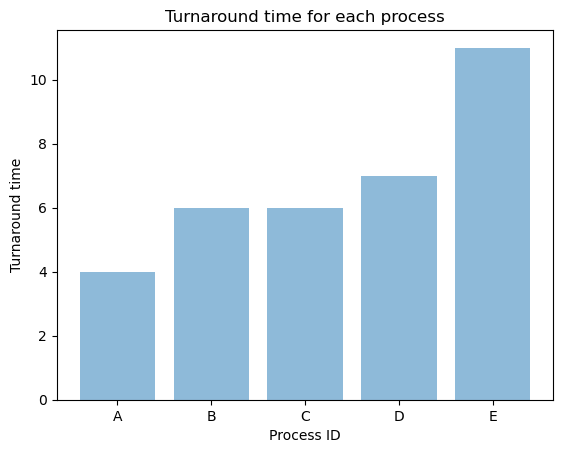

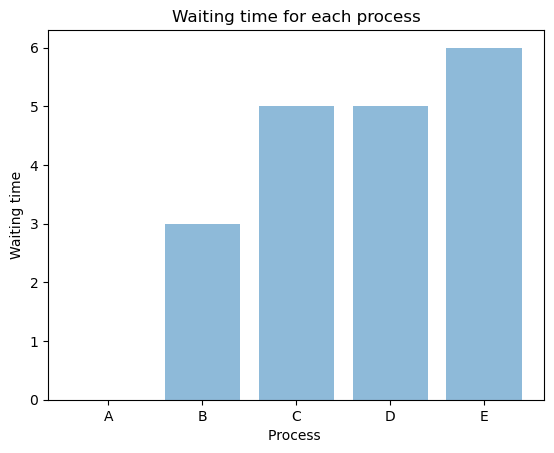

Average Turnaround Time: 6.8
Average Waiting Time: 3.8


In [6]:
# Driver Code

print("CPU Scheduling Software")
print()
print("Which algorithm you want to run?")
print()
print("For FCFS, Press 1")
print("For SJF, Press 2")
print("For Round Robin, Press 3")
print("For Priority Scheduling, Press 4")
Input = int(input("Enter your Choice = "))
print()

if Input == 1:
    print("FCFS:")
    if __name__ == "__main__":
        no_of_processes = int(input("Enter number of processes: "))
        fcfs = FCFS()
        fcfs.processData(no_of_processes)


elif Input == 2:
    print("SJF")
    if __name__ == "__main__":
        no_of_processes = int(input("Enter number of processes: "))
        sjf = SJF()
        sjf.processData(no_of_processes)
    
elif Input == 3:
    print("Round Robin")
    if __name__ == "__main__":
        no_of_processes = int(input("Enter number of processes: "))
        rr = RoundRobin()
        rr.processData(no_of_processes)
    
elif Input == 4:
    print("Priority Scheduling:")
    if __name__ == "__main__":
        no_of_processes = int(input("Enter number of processes: "))
        priority = Priority()
        priority.processData(no_of_processes)

elif Input == 0:
    print("Goodbye, have a great day.")
    
else:
    print("No such option exists, Please try again.")
    
